In [64]:
!pip install qiskit
import qiskit as qk
#from qiskit import IBMQ,Aer

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from numpy import pi
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

In [65]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-09 09:14:15,451: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.u3(2*pi/3, pi/3, -pi/3, qreg_q[0])

measureX=qk.QuantumCircuit(qreg_q, creg_c)
measureX.h(qreg_q)
measureX.measure(qreg_q[0], creg_c[0])

measureZ=qk.QuantumCircuit(qreg_q, creg_c)
measureZ.measure(qreg_q[0], creg_c[0])

testZ=circuit+measureZ
testX=circuit+measureX


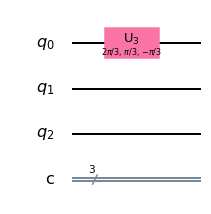

In [40]:
circuit.draw(output='mpl')

In [41]:
backend=Aer.get_backend('qasm_simulator')
#jobIBM=qk.execute(circuit,backend=backend,shots=1024)
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultSim=jobIBM.result()

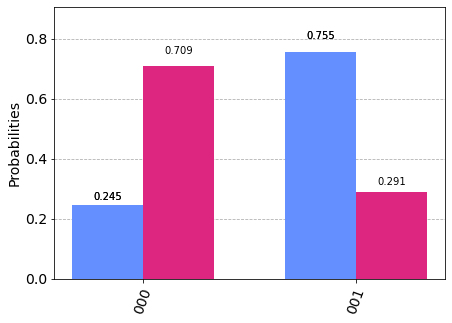

In [43]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultSim.get_counts(testZ),resultSim.get_counts(testX)])

By measuring in usual basis we determine $\cos\theta = 1/2$ so that $\theta=\pi/3$. By measuring in suparposition basis 
we get $\sin(2\theta)\cos\varphi = -  0.418 \approx - \sqrt 3/4$ which means $\varphi = \pi/3$ 

In [ ]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
#jobIBM=qk.execute(circuit,backend=backend,shots=1024)
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultExp=jobIBM.result()

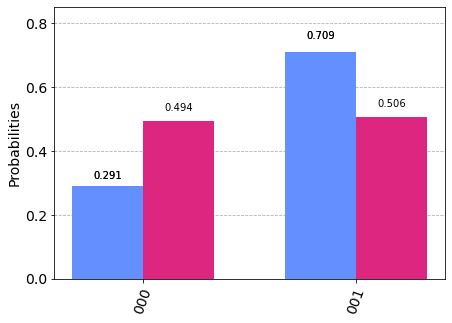

In [45]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(testZ),resultExp.get_counts(testX)])

In [72]:
qreg_q1 = QuantumRegister(3, 'q')
creg_c1 = ClassicalRegister(3, 'c')
circuit1 = QuantumCircuit(qreg_q1, creg_c1)

circuit1.rz((pi/3+pi/2), qreg_q1[0])
circuit1.h(qreg_q1[0])
circuit1.rz(pi*2/3, qreg_q1[0])
circuit1.h(qreg_q1[0])
circuit1.rz(-(pi/3+pi/2), qreg_q1[0])
#circuit1.measure(qreg_q1[0], creg_c1[0])

measureX=qk.QuantumCircuit(qreg_q1, creg_c1)
measureX.h(qreg_q1)
measureX.measure(qreg_q1[0], creg_c1[0])

measureZ=qk.QuantumCircuit(qreg_q1, creg_c1)
measureZ.measure(qreg_q1[0], creg_c1[0])

testZ1=circuit1+measureZ
testX1=circuit1+measureX

In [73]:
backend=Aer.get_backend('qasm_simulator')
#jobIBM=qk.execute(circuit,backend=backend,shots=1024)
jobIBM=qk.execute([testZ1,testX1],backend=backend,shots=1024)
resultSim1=jobIBM.result()

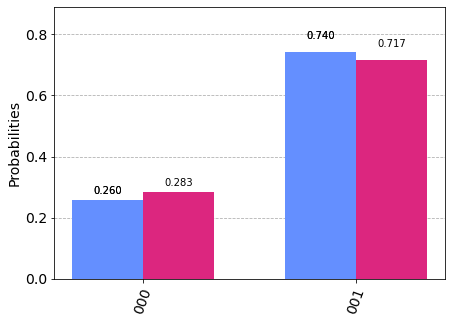

In [74]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultSim1.get_counts(testZ1),resultSim1.get_counts(testX1)])

In [17]:
backend=Aer.get_backend('qasm_simulator')
jobIBM1=qk.execute(circuit1,backend=backend,shots=1024)
resultSim1=jobIBM1.result()

In [18]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
jobIBM=qk.execute(circuit1,backend=backend,shots=1024)
resultExp1=jobIBM.result()

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(circuit),resultSim.get_counts(circuit)])

In [8]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
my_provider = IBMQ.get_provider(hub='ibm-q')
my_provider.backends()

from qiskit.providers.ibmq import least_busy

small_devices = my_provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
my_provider = IBMQ.get_provider()
#backend  = my_provider.get_backend('ibmq_ourense')
#backend  = my_provider.get_backend('ibmq_qasm_simulator')
#backend=Aer.get_backend('qasm_simulator')